In [1]:
import glob, os
import pandas as pd

In [2]:
figures_folder = "nov24_figures"

In [3]:
experiments_output_dirpath = "/nfs/turbo/coe-mihalcea/alvarovh/large_data/cse598_project/experimental_results/Nov24/initiallambdasscaled/results_0.01/"

# model_paths = glob.glob(experiments_output_dirpath + "*1.keras")

val_variable_metrics_paths = glob.glob(experiments_output_dirpath + "val_variable_metrics*.csv")
train_variable_metrics_paths = glob.glob(experiments_output_dirpath + "train_variable_metrics*.csv")

batch_val_log_paths = glob.glob(experiments_output_dirpath + "batch_val_log*.csv")
batch_train_log_paths = glob.glob(experiments_output_dirpath + "batch_train_log*.csv")


In [4]:
experiments_log_paths = glob.glob(experiments_output_dirpath + "../*.log")
experiments_log_paths

# lets get the model names from the experiments_log_paths. The log file has a bunch of lines, but we need the one that contains the substring "epoch_1.keras"

model_paths = []
for log_path in experiments_log_paths:
    found_it = False
    with open(log_path, "r") as log_file:
        for line in log_file:
            if "epoch_1.keras" in line:
                model_paths.append(line.split(" ")[3])
                found_it = True
                break
    if not found_it:
        model_paths.append("NOT FOUND")

experiment_names = [os.path.basename(experiments_log_paths[i]).replace(".log","") for i in range(len(experiments_log_paths))]
model_basenames = [os.path.basename(model_paths[i]) for i in range(len(model_paths))]
len(experiment_names), len(model_basenames)

models_df = pd.DataFrame({"experiment_name": experiment_names, "model_path": model_paths, "model_basename": model_basenames})




In [5]:
# filter out NO FOUND in model_paths
models_df = models_df[models_df["model_path"] != "NOT FOUND"].reset_index(drop=True)
models_df

,experiment_name,model_path,model_basename
0,constant_nonneg_sf0.25,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,best_model_lambdas_excluded_mass_excluded_radi...
1,zero_model,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,best_model_lambdas_excluded_mass_excluded_radi...
2,constant_radiation_sf0.05,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,best_model_lambdas_excluded_mass_excluded_nonn...
3,constant_mass_sf0.05,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,best_model_lambdas_excluded_radiation_excluded...
4,constant_mass_sf0.5,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,best_model_lambdas_excluded_radiation_excluded...
5,constant_lambdas_str,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,best_model_lambdas_constant_mass_constant_nonn...
6,constant_nonneg_sf0.05,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,best_model_lambdas_excluded_mass_excluded_radi...
7,constant_radiation_sf1,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,best_model_lambdas_excluded_mass_excluded_nonn...
8,constant_radiation_sf0.25,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,best_model_lambdas_excluded_mass_excluded_nonn...
9,constant_nonneg_sf1,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,best_model_lambdas_excluded_mass_excluded_radi...


In [6]:
model_basenames

['best_model_lambdas_excluded_mass_excluded_radiation_constant_mass_constant_nonneg_constant_radiation_scaledfactorofmse_1.00_scaledfactorofmass_1.00_scaledfactorofradiation_1.00_scaledfactorofnonneg_0.25_datafrac_0.01_epoch_1.keras',
 'best_model_lambdas_excluded_mass_excluded_radiation_excluded_nonneg_constant_mass_constant_radiation_constant_nonneg_scaledfactorofmse_1.00_scaledfactorofmass_1.00_scaledfactorofradiation_1.00_scaledfactorofnonneg_1.00_datafrac_0.01_epoch_1.keras',
 'best_model_lambdas_excluded_mass_excluded_nonneg_constant_mass_constant_nonneg_constant_radiation_scaledfactorofmse_1.00_scaledfactorofmass_1.00_scaledfactorofradiation_0.05_scaledfactorofnonneg_1.00_datafrac_0.01_epoch_1.keras',
 'best_model_lambdas_excluded_radiation_excluded_nonneg_constant_mass_constant_nonneg_constant_radiation_scaledfactorofmse_1.00_scaledfactorofmass_0.05_scaledfactorofradiation_1.00_scaledfactorofnonneg_1.00_datafrac_0.01_epoch_1.keras',
 'best_model_lambdas_excluded_radiation_exclu

In [7]:
models_df["model_basename"]

0     best_model_lambdas_excluded_mass_excluded_radi...
1     best_model_lambdas_excluded_mass_excluded_radi...
2     best_model_lambdas_excluded_mass_excluded_nonn...
3     best_model_lambdas_excluded_radiation_excluded...
4     best_model_lambdas_excluded_radiation_excluded...
5     best_model_lambdas_constant_mass_constant_nonn...
6     best_model_lambdas_excluded_mass_excluded_radi...
7     best_model_lambdas_excluded_mass_excluded_nonn...
8     best_model_lambdas_excluded_mass_excluded_nonn...
9     best_model_lambdas_excluded_mass_excluded_radi...
10    best_model_lambdas_excluded_mass_excluded_nonn...
11    best_model_lambdas_excluded_nonneg_excluded_ra...
12    best_model_lambdas_excluded_radiation_excluded...
13    best_model_lambdas_excluded_mass_excluded_radi...
14    best_model_lambdas_excluded_mass_excluded_nonn...
15    best_model_lambdas_scaledfactorofmse_1.00_scal...
16    best_model_lambdas_excluded_radiation_excluded...
17    best_model_lambdas_excluded_mass_excluded_

In [8]:

string_identifiers = []
for i in range(len(models_df["model_basename"])):
    # print(models_df["model_basename"][i])
    model_basename = models_df["model_basename"][i]
    lambda_ = model_basename.split("best_model_lambdas_")[1].split("_datafrac_")[0]
    # print(lambda_)
    string_identifiers.append(lambda_)

models_df["string_identifier"] = string_identifiers

In [9]:
string_identifiers[0]

'excluded_mass_excluded_radiation_constant_mass_constant_nonneg_constant_radiation_scaledfactorofmse_1.00_scaledfactorofmass_1.00_scaledfactorofradiation_1.00_scaledfactorofnonneg_0.25'

In [10]:
for i in range(len(models_df)):
#     val_variable_metrics_paths = glob.glob(experiments_output_dirpath + "val_variable_metrics*.csv")
# train_variable_metrics_paths = glob.glob(experiments_output_dirpath + "train_variable_metrics*.csv")

# batch_val_log_paths = glob.glob(experiments_output_dirpath + "batch_val_log*.csv")
# batch_train_log_paths = glob.glob(experiments_output_dirpath + "batch_train_log*.csv")
    # lets add the batch_val, batch_train, val_variable, train_variable metrics paths to the dataframe
    # we have to search on them using the string_identifier, if we find them, we add them to the dataframe in that row
    string_identifier = models_df["string_identifier"][i]
    # between val_variable_metrics_lambdas_ and _datafrac_
    val_variable_metrics_path = [path for path in val_variable_metrics_paths if string_identifier == path.split("val_variable_metrics_lambdas_")[1].split("_datafrac_")[0]]
    train_variable_metrics_path = [path for path in train_variable_metrics_paths if string_identifier == path.split("train_variable_metrics_lambdas_")[1].split("_datafrac_")[0]]
    batch_val_log_path = [path for path in batch_val_log_paths if string_identifier == path.split("batch_val_log_lambdas_")[1].split("_datafrac_")[0]]
    batch_train_log_path = [path for path in batch_train_log_paths if string_identifier == path.split("batch_train_log_lambdas_")[1].split("_datafrac_")[0]]

    if len(val_variable_metrics_path) == 1:
        models_df.at[i, "val_variable_metrics_path"] = val_variable_metrics_path[0]
    elif len(val_variable_metrics_path) > 1:
        print("More than one val_variable_metrics_path found for string_identifier: ", string_identifier)
        print([os.path.basename(i) for i in val_variable_metrics_path])
    if len(train_variable_metrics_path) == 1:
        models_df.at[i, "train_variable_metrics_path"] = train_variable_metrics_path[0]
    if len(batch_val_log_path) == 1:
        models_df.at[i, "batch_val_log_path"] = batch_val_log_path[0]
    if len(batch_train_log_path) == 1:
        models_df.at[i, "batch_train_log_path"] = batch_train_log_path[0]
        

In [11]:
def get_batch_train_log(models_df, experiment_name):
    batch_train_log_path = models_df[models_df["experiment_name"] == experiment_name]["batch_train_log_path"].values[0]
    batch_train_log = pd.read_csv(batch_train_log_path)
    batch_train_log = batch_train_log[batch_train_log["epoch"] == 1]
    return batch_train_log

def get_batch_val_log(models_df, experiment_name):
    batch_val_log_path = models_df[models_df["experiment_name"] == experiment_name]["batch_val_log_path"].values[0]
    batch_val_log = pd.read_csv(batch_val_log_path)
    batch_val_log = batch_val_log[batch_val_log["epoch"] == 1]
    return batch_val_log

def get_val_variable_metrics(models_df, experiment_name):
    val_variable_metrics_path = models_df[models_df["experiment_name"] == experiment_name]["val_variable_metrics_path"].values[0]
    val_variable_metrics = pd.read_csv(val_variable_metrics_path)
    val_variable_metrics = val_variable_metrics[val_variable_metrics["epoch"] == 1]
    return val_variable_metrics

def get_train_variable_metrics(models_df, experiment_name):
    train_variable_metrics_path = models_df[models_df["experiment_name"] == experiment_name]["train_variable_metrics_path"].values[0]
    train_variable_metrics = pd.read_csv(train_variable_metrics_path)
    train_variable_metrics = train_variable_metrics[train_variable_metrics["epoch"] == 1]
    return train_variable_metrics


In [12]:
# ['epoch', 'batch', 'loss', 'mae', 'mse', 'mass_loss', 'radiation_loss','nonneg_loss', 'lambda_mass', 'lambda_radiation', 'lambda_nonneg']
# aesthetic_names_for_plotting = ["Epoch", "Batch", "Loss (log scale)", "MAE (log scale)", "MSE (log scale)", "Mass Loss (log scale)", "Radiation Loss (log scale)", "Nonneg Loss (log scale)", "Lambda Mass", "Lambda Radiation", "Lambda Nonneg"]
# lets make it a dict so it is easier to use:
asesthetic_names_for_plotting_dict = {
    "epoch": "Epoch",
    "batch": "Batch",
    "loss": "Loss (log scale)",
    "mae": "MAE (log scale)",
    "mse": "MSE (log scale)",
    "mass_loss": "Mass Loss (log scale)",
    "radiation_loss": "Radiation Loss (log scale)",
    "nonneg_loss": "Nonneg Loss (log scale)",
    "lambda_mass": "Mass λ",
    "lambda_radiation": "Radiation λ",
    "lambda_nonneg": "Nonneg λ"
}

In [13]:
def plot_batch_train_val_loss_acc(batch_train_log, variables=["loss"], save_path=None):
    import matplotlib.pyplot as plt
    # for variable in variables:
    #     plt.plot(batch_train_log["batch"], batch_train_log[variable], label=variable)
    # they dont share units, so we need to plot them separately
    # compute how many rows and columns depending on how many variables we have
    nrows = len(variables)
    ncols = 1
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5, 2.5*nrows))
    for i, variable in enumerate(variables):
        # use better color for the lines
        axs[i].plot(batch_train_log["batch"], batch_train_log[variable], label=variable, color="black")
        # axs[i].set_title(variable)
        axs[i].set_xlabel("batch")
        if variable == "loss":
            axs[i].set_yscale("log")
        axs[i].set_ylabel(asesthetic_names_for_plotting_dict[variable])
        # axs[i].legend()

    # plt.legend() lets remove the legend:
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path)
    else:
        plt.show()


In [14]:
models_df

,experiment_name,model_path,model_basename,string_identifier,val_variable_metrics_path,train_variable_metrics_path,batch_val_log_path,batch_train_log_path
0,constant_nonneg_sf0.25,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,best_model_lambdas_excluded_mass_excluded_radi...,excluded_mass_excluded_radiation_constant_mass...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...
1,zero_model,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,best_model_lambdas_excluded_mass_excluded_radi...,excluded_mass_excluded_radiation_excluded_nonn...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...
2,constant_radiation_sf0.05,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,best_model_lambdas_excluded_mass_excluded_nonn...,excluded_mass_excluded_nonneg_constant_mass_co...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...
3,constant_mass_sf0.05,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,best_model_lambdas_excluded_radiation_excluded...,excluded_radiation_excluded_nonneg_constant_ma...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...
4,constant_mass_sf0.5,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,best_model_lambdas_excluded_radiation_excluded...,excluded_radiation_excluded_nonneg_constant_ma...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...
5,constant_lambdas_str,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,best_model_lambdas_constant_mass_constant_nonn...,constant_mass_constant_nonneg_constant_radiati...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...
6,constant_nonneg_sf0.05,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,best_model_lambdas_excluded_mass_excluded_radi...,excluded_mass_excluded_radiation_constant_mass...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...
7,constant_radiation_sf1,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,best_model_lambdas_excluded_mass_excluded_nonn...,excluded_mass_excluded_nonneg_constant_mass_co...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...
8,constant_radiation_sf0.25,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,best_model_lambdas_excluded_mass_excluded_nonn...,excluded_mass_excluded_nonneg_constant_mass_co...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...
9,constant_nonneg_sf1,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,best_model_lambdas_excluded_mass_excluded_radi...,excluded_mass_excluded_radiation_constant_mass...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...,/nfs/turbo/coe-mihalcea/alvarovh/large_data/cs...


In [15]:
models_df["experiment_name"]

0          constant_nonneg_sf0.25
1                      zero_model
2       constant_radiation_sf0.05
3            constant_mass_sf0.05
4             constant_mass_sf0.5
5            constant_lambdas_str
6          constant_nonneg_sf0.05
7          constant_radiation_sf1
8       constant_radiation_sf0.25
9             constant_nonneg_sf1
10    trainable_lambdas_radiation
11         trainable_lambdas_mass
12              constant_mass_sf1
13          constant_nonneg_sf0.5
14       constant_radiation_sf0.5
15              train_all_lambdas
16           constant_mass_sf0.25
17       trainable_lambdas_nonneg
Name: experiment_name, dtype: object

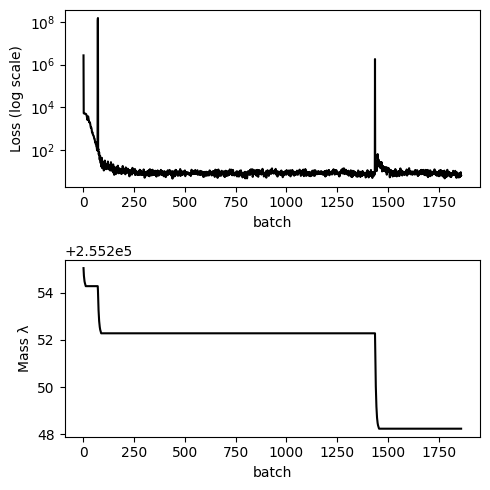

In [16]:
# Let's try getting the results for the zero model
experiment_name = "zero_model"
# experiment_name = experiment_names[5]
batch_train_log = get_batch_train_log(models_df, experiment_name)
batch_val_log = get_batch_val_log(models_df, experiment_name)
val_variable_metrics = get_val_variable_metrics(models_df, experiment_name)
train_variable_metrics = get_train_variable_metrics(models_df, experiment_name)

# plot_batch_train_val_loss_acc(get_batch_train_log(models_df, "zero_model"), variables=["loss"])
experiment_name = "trainable_lambdas_mass"
plot_batch_train_val_loss_acc(get_batch_train_log(models_df, experiment_name), variables=["loss", "lambda_mass" ], save_path=f"{figures_folder}/{experiment_name}_lossVSlambda.png")


In [17]:
get_batch_train_log(models_df, "trainable_lambdas_mass")

,epoch,batch,loss,mae,mse,mass_loss,radiation_loss,nonneg_loss,lambda_mass,lambda_radiation,lambda_nonneg
0,1,1,2.721556e+06,0.000000,0.000000,10.642372,0.0,0.0,255255.046875,0.0,0.0
1,1,2,5.388466e+03,17.866089,5036.199219,0.000038,0.0,0.0,255254.859375,0.0,0.0
2,1,3,5.347104e+03,18.215492,5207.536621,0.000032,0.0,0.0,255254.718750,0.0,0.0
3,1,4,5.187970e+03,18.313206,5251.334473,0.000031,0.0,0.0,255254.625000,0.0,0.0
4,1,5,5.281750e+03,18.308514,5233.507812,0.000030,0.0,0.0,255254.546875,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1855,1,1856,8.606627e+00,1.011102,82.414879,0.000033,0.0,0.0,255248.234375,0.0,0.0
1856,1,1857,6.065185e+00,1.010649,82.370598,0.000023,0.0,0.0,255248.234375,0.0,0.0
1857,1,1858,9.438554e+00,1.010193,82.326340,0.000036,0.0,0.0,255248.234375,0.0,0.0
1858,1,1859,6.780430e+00,1.009772,82.282219,0.000026,0.0,0.0,255248.234375,0.0,0.0


# Plots

In [18]:
# # ['constant_nonneg_sf0.25',
# #  'zero_model',
# #  'constant_radiation_sf0.05',
# #  'constant_mass_sf0.05',
# #  'constant_mass_sf0.5',
# #  'constant_lambdas_str',
# #  'constant_nonneg_sf0.05',
# #  'constant_radiation_sf1',
# #  'constant_radiation_sf0.25',
# #  'constant_nonneg_sf1',
# #  'trainable_lambdas_radiation',
# #  'trainable_lambdas_mass',
# #  'constant_mass_sf1',
# #  'constant_nonneg_sf0.5',
# #  'constant_radiation_sf0.5',
# #  'train_all_lambdas',
# #  'constant_mass_sf0.25',
# #  'trainable_lambdas_nonneg']
# lets make it a dict, more useful:
experiment_names_aesthetic_dict = {
    "constant_nonneg_sf0.25": "Nonneg λ=0.25",
    "zero_model": "Zero Model",
    "constant_radiation_sf0.05": "Radiation λ=0.05",
    "constant_mass_sf0.05": "Mass λ=0.05",
    "constant_mass_sf0.5": "Mass λ=0.5",
    "constant_lambdas_str": "All λs=1",
    "constant_nonneg_sf0.05": "Nonneg λ=0.05",
    "constant_radiation_sf1": "Radiation λ=1",
    "constant_radiation_sf0.25": "Radiation λ=0.25",
    "constant_nonneg_sf1": "Nonneg λ=1",
    "trainable_lambdas_radiation": "Trainable Radiation λ",
    "trainable_lambdas_mass": "Trainable Mass λ",
    "constant_mass_sf1": "Mass λ=1",
    "constant_nonneg_sf0.5": "Nonneg λ=0.5",
    "constant_radiation_sf0.5": "Radiation λ=0.5",
    "train_all_lambdas": "Train All λs",
    "constant_mass_sf0.25": "Mass λ=0.25",
    "trainable_lambdas_nonneg": "Trainable Nonneg λ",
}

In [19]:
#see if we included all experiment_names
import numpy as np
np.array(list(experiment_names_aesthetic_dict.keys())),models_df["experiment_name"].values


(array(['constant_nonneg_sf0.25', 'zero_model',
        'constant_radiation_sf0.05', 'constant_mass_sf0.05',
        'constant_mass_sf0.5', 'constant_lambdas_str',
        'constant_nonneg_sf0.05', 'constant_radiation_sf1',
        'constant_radiation_sf0.25', 'constant_nonneg_sf1',
        'trainable_lambdas_radiation', 'trainable_lambdas_mass',
        'constant_mass_sf1', 'constant_nonneg_sf0.5',
        'constant_radiation_sf0.5', 'train_all_lambdas',
        'constant_mass_sf0.25', 'trainable_lambdas_nonneg'], dtype='<U27'),
 array(['constant_nonneg_sf0.25', 'zero_model',
        'constant_radiation_sf0.05', 'constant_mass_sf0.05',
        'constant_mass_sf0.5', 'constant_lambdas_str',
        'constant_nonneg_sf0.05', 'constant_radiation_sf1',
        'constant_radiation_sf0.25', 'constant_nonneg_sf1',
        'trainable_lambdas_radiation', 'trainable_lambdas_mass',
        'constant_mass_sf1', 'constant_nonneg_sf0.5',
        'constant_radiation_sf0.5', 'train_all_lambdas',
    

## Variable mse: status_t

/tmp/ipykernel_1378117/307376930.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_metrics["experiment_name_aesthetic"] = filtered_metrics["experiment_name"].map(experiment_names_aesthetic_dict)


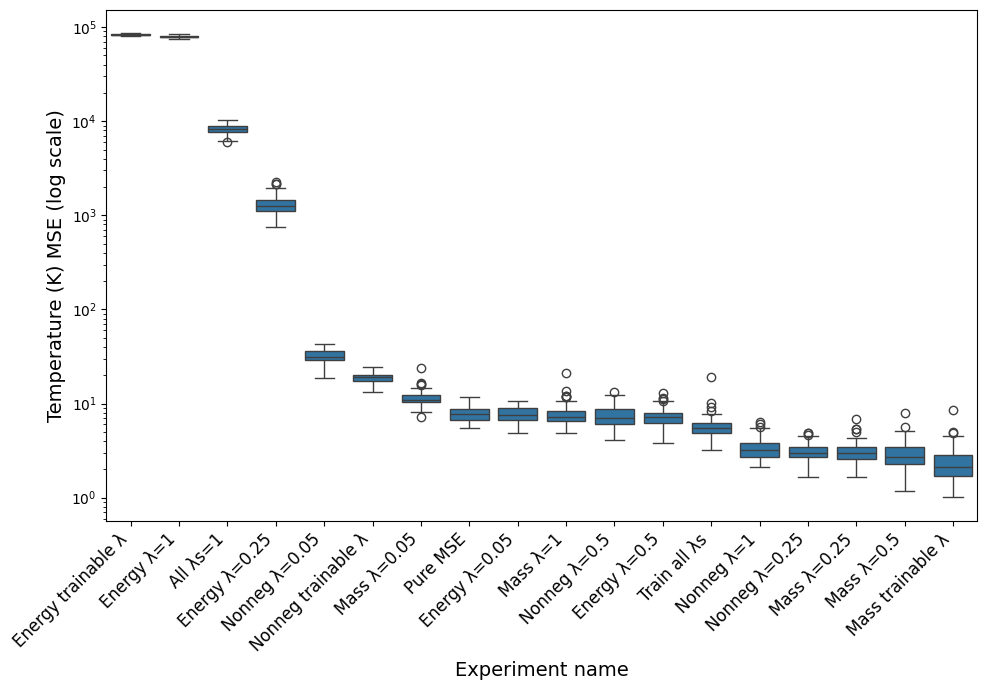

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Aesthetic Mapping Dictionary
experiment_names_aesthetic_dict = {
    "constant_nonneg_sf0.25": "Nonneg λ=0.25",
    "zero_model": "Pure MSE",
    "constant_radiation_sf0.05": "Energy λ=0.05",
    "constant_mass_sf0.05": "Mass λ=0.05",
    "constant_mass_sf0.5": "Mass λ=0.5",
    "constant_lambdas_str": "All λs=1",
    "constant_nonneg_sf0.05": "Nonneg λ=0.05",
    "constant_radiation_sf1": "Energy λ=1",
    "constant_radiation_sf0.25": "Energy λ=0.25",
    "constant_nonneg_sf1": "Nonneg λ=1",
    "trainable_lambdas_radiation": "Energy trainable λ",
    "trainable_lambdas_mass": "Mass trainable λ",
    "constant_mass_sf1": "Mass λ=1",
    "constant_nonneg_sf0.5": "Nonneg λ=0.5",
    "constant_radiation_sf0.5": "Energy λ=0.5",
    "train_all_lambdas": "Train all λs",
    "constant_mass_sf0.25": "Mass λ=0.25",
    "trainable_lambdas_nonneg": "Nonneg trainable λ"
}

def plot_val_variable_metrics_comparison_boxplot(val_variable_metrics_list, experiment_names, variable_name, custom_y_label=None):
    """
    Plots boxplots of MSE for a specific variable across different experiments,
    ordered from highest to lowest average MSE.

    Parameters:
    - val_variable_metrics_list: List of pandas DataFrames containing validation metrics.
    - experiment_names: List of experiment names corresponding to each DataFrame.
    - variable_name: The name of the variable to plot metrics for.
    - custom_y_label: Optional. Custom label for the y-axis.
    """

    # Validation: Ensure matching lengths
    if len(val_variable_metrics_list) != len(experiment_names):
        raise ValueError("The length of val_variable_metrics_list and experiment_names must be the same.")

    # Assign original experiment names to each DataFrame
    for i in range(len(val_variable_metrics_list)):
        val_variable_metrics_list[i] = val_variable_metrics_list[i].copy()  # Avoid SettingWithCopyWarning
        val_variable_metrics_list[i]["experiment_name"] = experiment_names[i]

    # Concatenate all DataFrames
    all_variable_metrics = pd.concat(val_variable_metrics_list, ignore_index=True)

    # Filter for epoch 1 and the specified variable
    filtered_metrics = all_variable_metrics[
        (all_variable_metrics["epoch"] == 1) & 
        (all_variable_metrics["variable_name"] == variable_name)
    ]

    # Check if any data is available after filtering
    if filtered_metrics.empty:
        raise ValueError(f"No data found for variable '{variable_name}' at epoch 1.")

    # Calculate average MSE for each experiment
    avg_mse_per_experiment = filtered_metrics.groupby("experiment_name")["mse"].mean().reset_index()

    # Sort experiments from highest to lowest average MSE
    avg_mse_sorted = avg_mse_per_experiment.sort_values(by="mse", ascending=False).reset_index(drop=True)
    sorted_experiment_names = avg_mse_sorted["experiment_name"].tolist()

    # Map sorted experiment names to aesthetic labels
    sorted_experiment_aesthetics = []
    for exp in sorted_experiment_names:
        aesthetic_name = experiment_names_aesthetic_dict.get(exp, exp)  # Use original name if not found
        if aesthetic_name == exp:
            print(f"Warning: '{exp}' not found in aesthetic mapping. Using original name.")
        sorted_experiment_aesthetics.append(aesthetic_name)

    # Map all experiment names in the data to aesthetic labels
    filtered_metrics["experiment_name_aesthetic"] = filtered_metrics["experiment_name"].map(experiment_names_aesthetic_dict)
    
    # Handle unmapped experiment names
    unmapped = filtered_metrics["experiment_name_aesthetic"].isnull()
    if unmapped.any():
        missing_experiments = filtered_metrics[unmapped]["experiment_name"].unique()
        print(f"Warning: The following experiments are missing in the aesthetic mapping and will retain their original names: {missing_experiments}")
        filtered_metrics.loc[unmapped, "experiment_name_aesthetic"] = filtered_metrics.loc[unmapped, "experiment_name"]

    # Plotting
    plt.figure(figsize=(10, 7))
    sns.boxplot(
        x="experiment_name_aesthetic", 
        y="mse", 
        data=filtered_metrics, 
        order=sorted_experiment_aesthetics, 
        # color="blue"
    )
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.xlabel("Experiment name", fontsize=14)
    if custom_y_label:
        plt.ylabel(custom_y_label, fontsize=14)
    else:
        plt.ylabel("MSE (log scale)", fontsize=14)
    plt.yscale("log")
    # plt.title(f"MSE for Variable: {variable_name}", fontsize=16)
    plt.tight_layout()
    plt.savefig(f"nov24_figures/{variable_name}_mse_comparison.png", dpi=300)
    plt.show()

    return filtered_metrics

# Example Usage
# Assuming 'models_df' and 'get_val_variable_metrics' are defined elsewhere in your code
# and 'experiment_names' is a list of experiment names matching 'experiment_names_aesthetic_dict'

val_variable_metrics_list = [get_val_variable_metrics(models_df, experiment_name) for experiment_name in experiment_names]
all_variable_metrics = plot_val_variable_metrics_comparison_boxplot(
    val_variable_metrics_list, 
    experiment_names, 
    "state_t", 
    custom_y_label="Temperature (K) MSE (log scale)"
)


In [21]:


all_variable_metrics["experiment_name"] = all_variable_metrics["experiment_name"].map(experiment_names_aesthetic_dict)

/tmp/ipykernel_1378117/2548694113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_variable_metrics["experiment_name"] = all_variable_metrics["experiment_name"].map(experiment_names_aesthetic_dict)


In [22]:
all_variable_metrics

,epoch,batch,variable_name,mae,mse,experiment_name,experiment_name_aesthetic
14,1,1,state_t,1.467237,2.663861,Nonneg λ=0.25,Nonneg λ=0.25
30,1,2,state_t,1.691678,3.802920,Nonneg λ=0.25,Nonneg λ=0.25
46,1,3,state_t,1.548814,2.966773,Nonneg λ=0.25,Nonneg λ=0.25
62,1,4,state_t,1.633625,3.373524,Nonneg λ=0.25,Nonneg λ=0.25
78,1,5,state_t,1.465242,2.822202,Nonneg λ=0.25,Nonneg λ=0.25
...,...,...,...,...,...,...,...
27582,1,92,state_t,4.311942,21.122017,Nonneg trainable λ,Nonneg trainable λ
27598,1,93,state_t,3.966111,18.993574,Nonneg trainable λ,Nonneg trainable λ
27614,1,94,state_t,4.189677,19.458981,Nonneg trainable λ,Nonneg trainable λ
27630,1,95,state_t,4.170172,19.711826,Nonneg trainable λ,Nonneg trainable λ


In [23]:
experiment_names

['constant_nonneg_sf0.25',
 'zero_model',
 'constant_radiation_sf0.05',
 'constant_mass_sf0.05',
 'constant_mass_sf0.5',
 'constant_lambdas_str',
 'constant_nonneg_sf0.05',
 'constant_radiation_sf1',
 'constant_radiation_sf0.25',
 'constant_nonneg_sf1',
 'trainable_lambdas_radiation',
 'trainable_lambdas_mass',
 'constant_mass_sf1',
 'constant_nonneg_sf0.5',
 'constant_radiation_sf0.5',
 'train_all_lambdas',
 'constant_mass_sf0.25',
 'trainable_lambdas_nonneg']

In [24]:
all_variable_metrics

,epoch,batch,variable_name,mae,mse,experiment_name,experiment_name_aesthetic
14,1,1,state_t,1.467237,2.663861,Nonneg λ=0.25,Nonneg λ=0.25
30,1,2,state_t,1.691678,3.802920,Nonneg λ=0.25,Nonneg λ=0.25
46,1,3,state_t,1.548814,2.966773,Nonneg λ=0.25,Nonneg λ=0.25
62,1,4,state_t,1.633625,3.373524,Nonneg λ=0.25,Nonneg λ=0.25
78,1,5,state_t,1.465242,2.822202,Nonneg λ=0.25,Nonneg λ=0.25
...,...,...,...,...,...,...,...
27582,1,92,state_t,4.311942,21.122017,Nonneg trainable λ,Nonneg trainable λ
27598,1,93,state_t,3.966111,18.993574,Nonneg trainable λ,Nonneg trainable λ
27614,1,94,state_t,4.189677,19.458981,Nonneg trainable λ,Nonneg trainable λ
27630,1,95,state_t,4.170172,19.711826,Nonneg trainable λ,Nonneg trainable λ


# Get Tables

In [ ]:
def get_average_mse_per_variable_per_experiment(val_variable_metrics_list, experiment_names):
    # lets make a table with the average mse for each variable for each experiment
    # lets make a dict with the data
    data = {}
    for i, experiment_name in enumerate(experiment_names):
        val_variable_metrics = val_variable_metrics_list[i]
        for variable_name in val_variable_metrics["variable_name"].unique():
            mse = val_variable_metrics[(val_variable_metrics["epoch"] == 1) & (val_variable_metrics["variable_name"] == variable_name)]["mse"].mean()
            if experiment_name not in data:
                data[experiment_name] = {}
            data[experiment_name][variable_name] = mse
    # lets make a dataframe from the dict, transposed
    df = pd.DataFrame(data).T

    # add overall mse
    df["overall_mse"] = df.mean(axis=1)

    # add aesthetic experiment names
    df["experiment_name"] = df.index
    df["experiment_name_aesthetic"] = df["experiment_name"].map(experiment_names_aesthetic_dict)

    return df

val_variable_metrics_list = [get_val_variable_metrics(models_df, experiment_name) for experiment_name in experiment_names]

average_mse_per_variable_per_experiment = get_average_mse_per_variable_per_experiment(val_variable_metrics_list, experiment_names)

average_mse_per_variable_per_experiment

,ptend_t,ptend_q0001,ptend_q0002,ptend_q0003,ptend_u,ptend_v,cam_out_NETSW,cam_out_FLWDS,cam_out_PRECSC,cam_out_PRECC,cam_out_SOLS,cam_out_SOLL,cam_out_SOLSD,cam_out_SOLLD,state_t,state_q0001,overall_mse,experiment_name,experiment_name_aesthetic
constant_nonneg_sf0.25,0.011029,0.013625,0.000230,0.000008,0.000211,0.000362,0.491361,3.346253,0.008539,0.014706,0.430650,0.405217,0.101515,0.086165,3.126672,0.000134,0.502292,constant_nonneg_sf0.25,Nonneg λ=0.25
zero_model,0.008610,0.013444,0.000228,0.000014,0.000159,0.000280,0.493889,0.048025,0.008688,0.011760,0.402101,0.392243,0.123150,0.109641,7.741461,0.000124,0.584613,zero_model,Pure MSE
constant_radiation_sf0.05,0.010973,0.014699,0.000260,0.000013,0.000206,0.000360,0.486858,3.272601,0.008120,0.011617,0.393750,0.368396,0.112090,0.093422,7.712440,0.000130,0.780371,constant_radiation_sf0.05,Energy λ=0.05
constant_mass_sf0.05,0.009556,0.013094,0.000310,0.000019,0.000197,0.000265,0.513851,3.181042,0.010942,0.011434,0.423447,0.407852,0.119738,0.107031,11.350051,0.000123,1.009309,constant_mass_sf0.05,Mass λ=0.05
constant_mass_sf0.5,0.010595,0.014490,0.000243,0.000019,0.000142,0.000285,0.495978,3.145704,0.010481,0.013688,0.392941,0.373790,0.124557,0.113347,2.929197,0.000122,0.476599,constant_mass_sf0.5,Mass λ=0.5
constant_lambdas_str,0.009771,0.014072,0.000255,0.000012,0.000197,0.000302,92.591384,415.761850,0.009201,0.015197,0.164664,0.132356,0.109201,0.095245,8338.193197,0.000129,552.943564,constant_lambdas_str,All λs=1
constant_nonneg_sf0.05,0.008486,0.012480,0.000322,0.000021,0.000156,0.000261,0.506803,3.178032,0.010104,0.013712,0.399406,0.387873,0.124269,0.107358,31.944975,0.000125,2.293399,constant_nonneg_sf0.05,Nonneg λ=0.05
constant_radiation_sf1,0.008042,0.013098,0.000215,0.000014,0.000160,0.000285,0.152798,1.486223,0.007107,0.014483,0.141142,0.132540,0.019329,0.036070,79568.888509,0.000128,4973.181259,constant_radiation_sf1,Energy λ=1
constant_radiation_sf0.25,0.009282,0.012386,0.000244,0.000011,0.000172,0.000272,387.734743,1685.066332,0.008825,0.012328,0.184009,0.386754,0.121720,0.109703,1307.982921,0.000125,211.351864,constant_radiation_sf0.25,Energy λ=0.25
constant_nonneg_sf1,0.007546,0.011866,0.000244,0.000010,0.000177,0.000348,0.490071,3.264218,0.010570,0.011495,0.402422,0.380810,0.114050,0.098984,3.356187,0.000129,0.509320,constant_nonneg_sf1,Nonneg λ=1


In [37]:
# order by state_t
output_table = average_mse_per_variable_per_experiment[["experiment_name_aesthetic", "state_t"]].sort_values(by="state_t", ascending=False)

# lets format for latex output
# two decimals
output_table["state_t"] = output_table["state_t"].apply(lambda x: f"{x:.2f}")

# output_table.to_latex("nov24_figures/average_state_t_mse_per_experiment.tex", index=False)
# lets use $\lambda$ instead of the lambda symbol: λ
output_table["experiment_name_aesthetic"] = output_table["experiment_name_aesthetic"].apply(lambda x: x.replace("λ", "$\lambda$"))

output_table.to_latex("nov24_figures/average_state_t_mse_per_experiment.tex", index=False)


# Earth plots